<a href="https://colab.research.google.com/github/viethung52/AI/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets               import cifar100
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers.convolutional   import Convolution2D, MaxPooling2D
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers  import RMSprop
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 

import matplotlib.pyplot as plt
import numpy as np

169017344/169001437 [==============================] - 4s 0us/step


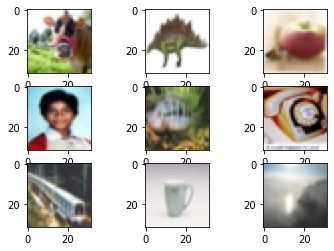

In [2]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

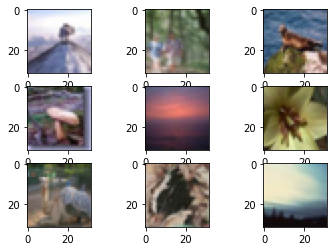

In [3]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
plt.show()

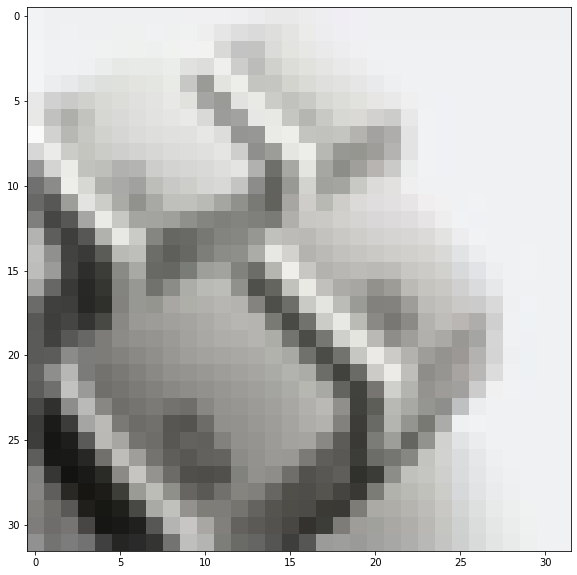

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[30000])

In [5]:
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [6]:
model=Sequential()
model.add(Dense(2024,kernel_initializer = 'normal' , activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(2024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2024)              6219752   
                                                                 
 dropout (Dropout)           (None, 2024)              0         
                                                                 
 dense_1 (Dense)             (None, 2024)              4098600   
                                                                 
 dropout_1 (Dropout)         (None, 2024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                20250     
                                                                 
Total params: 10,338,602
Trainable params: 10,338,602
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())	
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))	
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

In [8]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data=(x_test,y_test), callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

Epoch 1/100
782/782 [==============================] - 24s 13ms/step - loss: 4.0383 - accuracy: 0.1030 - val_loss: 3.2784 - val_accuracy: 0.2079
Epoch 2/100
782/782 [==============================] - 8s 11ms/step - loss: 3.1872 - accuracy: 0.2250 - val_loss: 2.6604 - val_accuracy: 0.3345
Epoch 3/100
782/782 [==============================] - 9s 11ms/step - loss: 2.8054 - accuracy: 0.2960 - val_loss: 2.4923 - val_accuracy: 0.3596
Epoch 4/100
782/782 [==============================] - 8s 11ms/step - loss: 2.5907 - accuracy: 0.3415 - val_loss: 2.2745 - val_accuracy: 0.4094
Epoch 5/100
782/782 [==============================] - 8s 11ms/step - loss: 2.4471 - accuracy: 0.3723 - val_loss: 2.1770 - val_accuracy: 0.4322
Epoch 6/100
782/782 [==============================] - 8s 11ms/step - loss: 2.3398 - accuracy: 0.3929 - val_loss: 2.0936 - val_accuracy: 0.4520
Epoch 7/100
782/782 [==============================] - 8s 11ms/step - loss: 2.2622 - accuracy: 0.4089 - val_loss: 2.0460 - val_accuracy

In [9]:
model.save('cifar100_model.h5')

In [10]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 1.582649827003479
Test accuracy 0.5674999952316284


In [11]:
y_pred = model.predict(x_test)
print(y_test)
print(y_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[2.3245890e-05 3.3334133e-04 6.0422104e-03 ... 1.5631830e-03
  4.3336307e-03 3.3973850e-04]
 [4.2191561e-04 2.2269965e-05 3.0827012e-03 ... 7.8773975e-02
  1.5389066e-03 1.7965116e-04]
 [6.3872089e-05 1.3310919e-04 2.9908027e-03 ... 2.1706759e-03
  4.8844870e-03 4.0033634e-04]
 ...
 [6.2844018e-04 1.1323590e-03 4.5673581e-04 ... 1.2880891e-03
  2.6881113e-04 3.2735539e-03]
 [1.8210589e-05 1.8295361e-05 4.5725849e-04 ... 1.7412215e-03
  1.3493332e-03 2.7764034e-02]
 [8.1578046e-06 8.0867828e-04 6.5866669e-05 ... 1.8467787e-05
  9.4851030e-06 2.6579286e-05]]


<function matplotlib.pyplot.show>

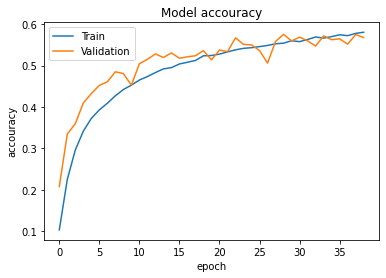

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accouracy')
plt.ylabel('accouracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show

Giá trị dự đoán:  55


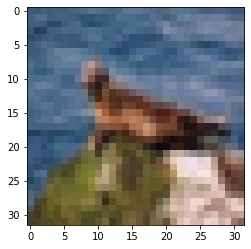

Giá trị dự đoán:  51


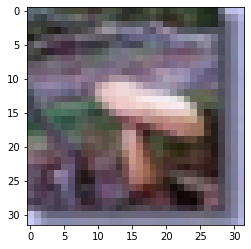

Giá trị dự đoán:  23


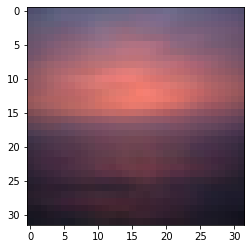

In [13]:
for i in range(2,5):
  plt.imshow(x_test[i].reshape(32,32,3), cmap='gray')
  y_predict = model.predict(x_test[i].reshape(1,32,32,3))
  print('Giá trị dự đoán: ', np.argmax(y_predict))
  plt.show()

In [14]:
from google.colab import files
uploaded = files.upload()

Saving tulip.png to tulip.png


Giá trị dự đoán: 62


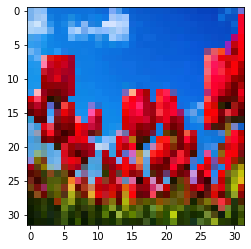

In [15]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('tulip.png', target_size=(32, 32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255.0

# load model
#model_final = load_model('cifar100_model.h5')
plt.imshow(img.reshape(32,32,3), cmap='gray')
# predict the class
result = model.predict(img.reshape(1,32,32,3))
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

In [16]:
from google.colab import files
uploaded = files.upload()

Saving tulip1.png to tulip1.png


In [18]:
from google.colab import files
uploaded = files.upload()

Saving boy.png to boy.png


Giá trị dự đoán: 82


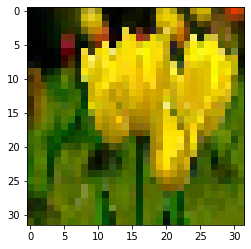

In [17]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('tulip1.png', target_size=(32, 32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255.0

# load model
#model_final = load_model('cifar100_model.h5')
plt.imshow(img.reshape(32,32,3), cmap='gray')
# predict the class
result = model.predict(img.reshape(1,32,32,3))
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

Giá trị dự đoán: 11


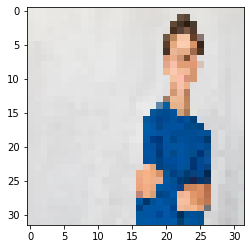

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('boy.png', target_size=(32, 32))
img = img_to_array(img)
img = img.reshape(1, 32, 32, 3)
img = img.astype('float32')
img = img / 255.0

# load model
#model_final = load_model('cifar100_model.h5')
plt.imshow(img.reshape(32,32,3), cmap='gray')
# predict the class
result = model.predict(img.reshape(1,32,32,3))
print('Giá trị dự đoán:', np.argmax(result))
plt.show()